In [1]:
# Team Jupiter

## A look into a movies success?
###         Does a movies budget influence how much a movie grosses?
###         Does a movies rating or genre affect how much of the budget was recovered from gross? 
###                (does the genre or how much people like the movie influence how much it makes?)
    
    

In [2]:
##     Main Data Analysis Questions

### 1. Does a movies budget influence box office success?   
###     (budget - IV, continuous) (worldwide gross adjusted for inflation - DV, continuous)
###     Linear Regression analysis

### 2. Does a movies rating or genre influence % of budget recovered (how profitable a movie is)?
###     (rating & genres - IV, category) (% of budget recovered - DV, continuous) ANOVA analysis


##     Supplemental Questions
### How well does comedy and fantasy genres fair against action, horror or other most common genres?
### Does the top rated genre change by over time? Does the most profitable genre change over time?
### Are movies more profitable now (2010-2020's) compared to when I was a child (1980-1990's)?  or by decades
### What are the most common genre tags for the top 100?

---

In [4]:
# import in packages needed for the project

import pandas as pd                 # to load in data
import numpy as np                  # to transform data
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm       # statsmodel packages to test for assumptions
import statsmodels.stats.api as sms 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scipy                        # scipy to run ANOVAs
from scipy import stats 
from scipy.stats import boxcox
import glob                         # to import,read and combine multiple csv files at once if needed
import os

---

In [5]:
# Import data for analysis

# read in movie list and ratings files

ratings_df = pd.read_csv("../Data/ratings.csv")
movies_df = pd.read_csv("../Data/movies.csv")

In [6]:
# read in movie budgets, top 500 movies and best films since 1950 csv files

top500movies_df = pd.read_csv("../Data/Most Profitable Movies of All Time - Top 500 Movies (pink = added by us).csv")
yearbestmovie_df = pd.read_csv("../Data/Best_Films_Every_Year_Since_1950.csv")
hollywood_df = pd.read_csv("../Data/The Hollywood Insider - all data.csv")

---

In [8]:
# Explore data, format columns if needed for stats testing

In [10]:
# look at the data frame that contains the budget and box office sales data, DOES NOT CONTAIN RATINGS or GENRES
top500movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          558 non-null    object 
 1   worldwide gross (m)            558 non-null    float64
 2   % budget recovered             558 non-null    object 
 3   X times budget recovered       558 non-null    float64
 4   budget  (millions)             558 non-null    float64
 5   domestic gross (m)             558 non-null    float64
 6   domestic %                     558 non-null    object 
 7   international gross (m)        558 non-null    object 
 8   % of gross from international  558 non-null    object 
 9   worldwide gross                558 non-null    object 
 10  year                           558 non-null    int64  
 11  decade                         558 non-null    object 
 12  source                         477 non-null    obj

In [11]:
list(top500movies_df)

['title ',
 'worldwide gross (m)',
 '% budget recovered',
 'X times budget recovered',
 'budget  (millions)',
 'domestic gross (m)',
 'domestic %',
 'international gross (m)',
 '% of gross from international',
 'worldwide gross',
 'year',
 'decade',
 'source',
 'budget source',
 'force label',
 'horror']

In [13]:
top500movies_df.head()

,title,worldwide gross (m),% budget recovered,X times budget recovered,budget (millions),domestic gross (m),domestic %,international gross (m),% of gross from international,worldwide gross,year,decade,source,budget source,force label,horror
0,300,456.0,702%,7.0,65.0,211.0,46.2%,245,53.8%,"456,082,343",2007,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror
1,1917,385.0,427%,4.3,90.0,159.0,41.4%,225,58.6%,"384,576,334",2019,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://www.nytimes.com/2020/01/12/movies/1917...,NaN,not horror
2,2012,791.0,396%,4.0,200.0,166.0,21.0%,625,79.0%,"791,217,826",2009,2000's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror
3,101 Dalmatians,321.0,479%,4.8,67.0,136.0,42.5%,185,57.5%,"320,689,294",1996,1990's,https://www.boxofficemojo.com/chart/ww_top_lif...,https://en.wikipedia.org/wiki/101_Dalmatians_(...,NaN,not horror
4,22 Jump Street,331.0,663%,6.6,50.0,192.0,57.9%,140,42.1%,"331,333,876",2014,2010's,https://www.boxofficemojo.com/chart/ww_top_lif...,NaN,NaN,not horror


In [20]:
# look at min/max values for movies release year
top500movies_df['year'].describe()

count     558.000000
mean     2009.568100
std         8.895454
min      1973.000000
25%      2005.000000
50%      2012.000000
75%      2016.000000
max      2022.000000
Name: year, dtype: float64

In [21]:
# look at min/max values for movies budgets
top500movies_df['budget  (millions)'].describe()

count    558.000000
mean     108.073235
std       75.962410
min        0.015000
25%       42.250000
50%      100.000000
75%      163.750000
max      379.000000
Name: budget  (millions), dtype: float64

In [24]:
# look at min/max values for movies profits
top500movies_df['X times budget recovered'].describe()

count      558.000000
mean        36.069713
std        551.723372
min          1.300000
25%          3.600000
50%          5.300000
75%         10.700000
max      12933.300000
Name: X times budget recovered, dtype: float64

In [23]:
# a look at how many movies from each decade 
top500movies_df.decade.value_counts()

2010's    312
2000's    142
1990's     59
2020's     26
1980's     15
1970's      4
Name: decade, dtype: int64

---

In [28]:
# Looking at my first question 

##    Does a movies budget influnce box office success (gross)?
##     IV -  budget (m) is continuous, float64 '177.0'
##     DV -  worldwide or domestic gross (m) is continuous, float64 '967.0'

## This looks like its fits for a linear regression, lets test the assumptions to find out.

In [29]:
# create a copy df to use for analysis

top500movies_df1 = top500movies_df.drop(top500movies_df.columns[[0,2,6,7,8,9,10,11,12,13,14,15]], axis=1)
top500movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   worldwide gross (m)       558 non-null    float64
 1   X times budget recovered  558 non-null    float64
 2   budget  (millions)        558 non-null    float64
 3   domestic gross (m)        558 non-null    float64
dtypes: float64(4)
memory usage: 17.6 KB


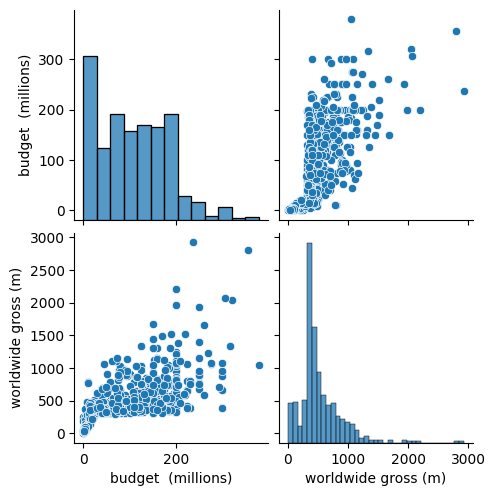

In [39]:
## create a scatter plot to test for linearity
WorldGross_LR = top500movies_df1[['budget  (millions)', 'worldwide gross (m)']].copy()
sns.pairplot(WorldGross_LR)

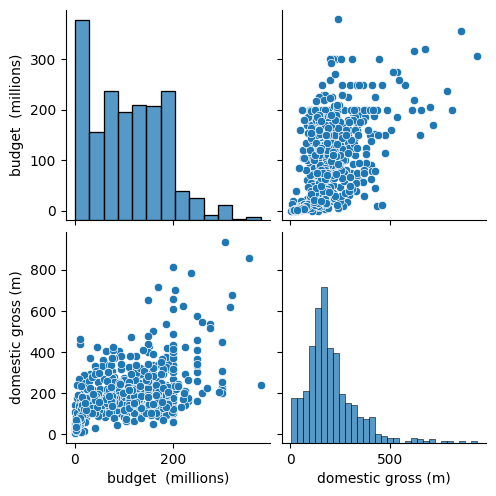

In [38]:
## does not appear to be normally distributed, look at domestic gross as well

Domestic_LR = top500movies_df1[['budget  (millions)', 'domestic gross (m)']].copy()
sns.pairplot(Domestic_LR)

In [35]:
## budget still seems a little skewed but the scatter plot does appear to become slighlty more linear

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_10368\2885834539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WorldGross_LR['budget  (millions)'])


<AxesSubplot: xlabel='budget  (millions)', ylabel='Density'>

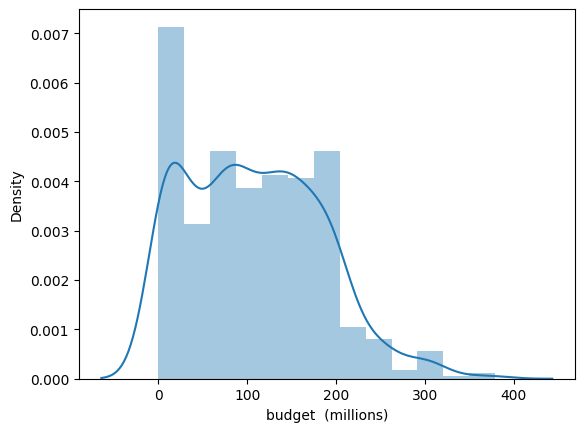

In [40]:
sns.distplot(WorldGross_LR['budget  (millions)'])

In [ ]:
## the budget distribution plot look rougly even, Worldwide & Domestic are skewed slightly positive

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_10368\731552005.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WorldGross_LR['worldwide gross (m)'])


<AxesSubplot: xlabel='worldwide gross (m)', ylabel='Density'>

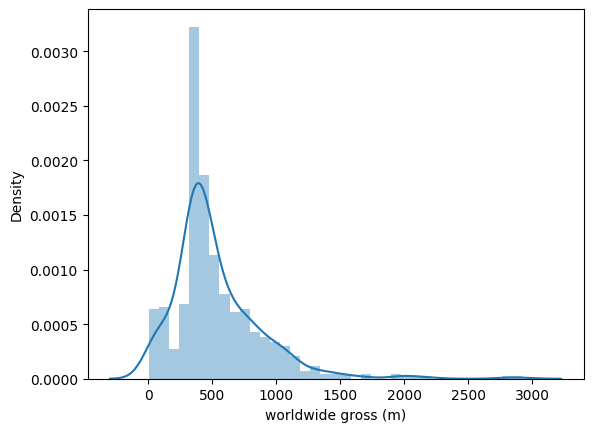

In [68]:
sns.distplot(WorldGross_LR['worldwide gross (m)'])

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_10368\3520876942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WorldGross_LR['worldwide gross (m)SQRT'])


<AxesSubplot: xlabel='worldwide gross (m)SQRT', ylabel='Density'>

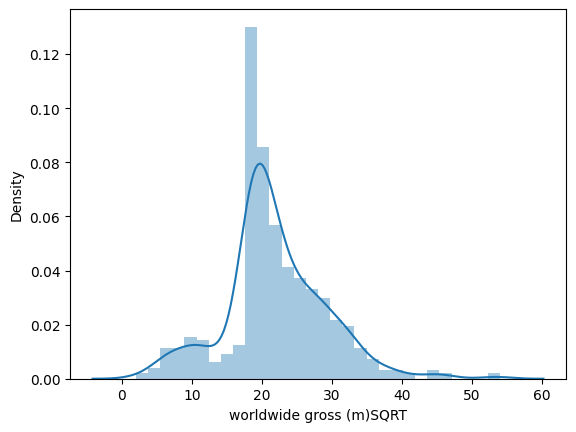

In [69]:
WorldGross_LR['worldwide gross (m)SQRT'] = np.sqrt(WorldGross_LR['worldwide gross (m)'])
sns.distplot(WorldGross_LR['worldwide gross (m)SQRT'])

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_10368\422701408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Domestic_LR['domestic gross (m)'])


<AxesSubplot: xlabel='domestic gross (m)', ylabel='Density'>

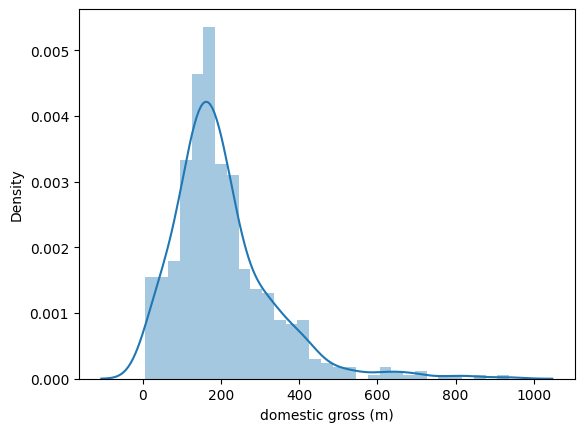

In [70]:
sns.distplot(Domestic_LR['domestic gross (m)'])

C:\Users\ifranklin\AppData\Local\Temp\ipykernel_10368\1025350852.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Domestic_LR['domestic gross (m)SQRT'])


<AxesSubplot: xlabel='domestic gross (m)SQRT', ylabel='Density'>

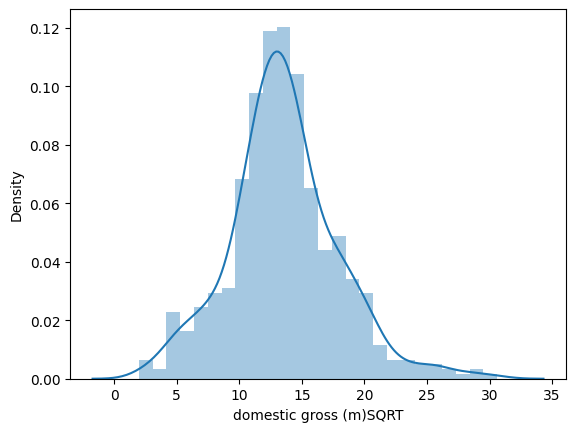

In [42]:
Domestic_LR['domestic gross (m)SQRT'] = np.sqrt(Domestic_LR['domestic gross (m)'])
sns.distplot(Domestic_LR['domestic gross (m)SQRT'])

In [43]:
# When Domestic is transformed using the square root function to correct of the positive skew it becomes normal.

In [71]:
## next test for Homoscedasticity for worldwide gross

x = WorldGross_LR['budget  (millions)']
y = WorldGross_LR['worldwide gross (m)SQRT']

WorldLR_model = sm.OLS(y,x).fit()

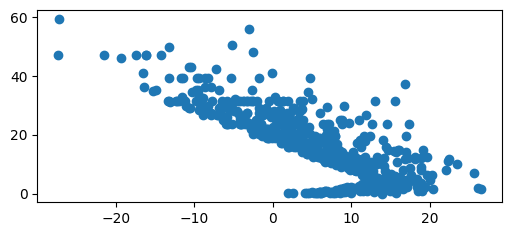

In [72]:
## next plot the residuals from the model

pred_val = WorldLR_model.fittedvalues.copy()
true_val = WorldGross_LR['worldwide gross (m)SQRT'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [46]:
# does not appear to be linear, there is a 'grouping' to it

In [73]:
## next test for Homoscedasticity for domestic gross

x = Domestic_LR['budget  (millions)']
y = Domestic_LR['domestic gross (m)SQRT']

DomesticLR_model = sm.OLS(y,x).fit()

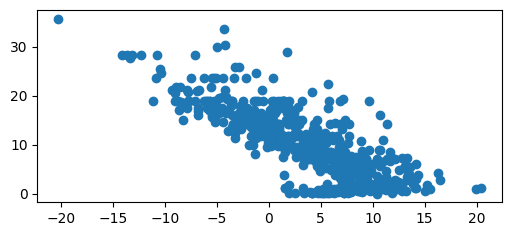

In [74]:
## next plot the residuals from the model

pred_val = DomesticLR_model.fittedvalues.copy()
true_val = Domestic_LR['domestic gross (m)SQRT'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [57]:
# The domestic model has a more linear lining up of the data points

In [61]:
# Breusch Pagan test , both df models using same budget column
sms.diagnostic.het_breuschpagan(residual, WorldGross_LR[['budget  (millions)']])

(87.7066447949598, nan, 103.87686878861744, 1.7524508706188376e-22)

In [62]:
## p-value is less than 0.5 (stastically significant)
## violated the assumption of homoscedasticity

In [63]:
# Harvey Collier test - worldwide
sms.linear_harvey_collier(WorldLR_model)

TtestResult(statistic=2.7083850383566, pvalue=0.00697015176131871, df=554)

In [64]:
# Harvey Collier test - domestic
sms.linear_harvey_collier(DomesticLR_model)

TtestResult(statistic=11.70951439573123, pvalue=1.8848896504606738e-28, df=554)

In [65]:
# Both test come back still show that the data violates the assumption of homoscedasticity.

(array([ 45.,  56.,  38.,  54.,  93.,  86., 106.,  63.,  13.,   4.]),
 array([-1.65590212,  2.93172015,  7.51934243, 12.1069647 , 16.69458698,
        21.28220925, 25.86983153, 30.4574538 , 35.04507608, 39.63269835,
        44.22032063]),
 <BarContainer object of 10 artists>)

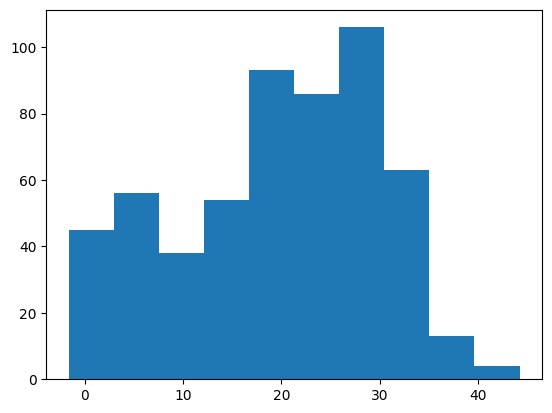

In [67]:
# try Box-Cox transformation
transformed, _ = boxcox(WorldGross_LR['budget  (millions)'])
plt.hist(transformed)

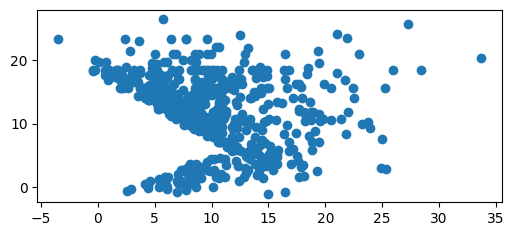

In [77]:
x = transformed
WorldLR_model = sm.OLS(y,x).fit()
pred_val = WorldLR_model.fittedvalues.copy()
true_val = WorldGross_LR['worldwide gross (m)SQRT'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [78]:
## still violated the assumption of homoscedasticity

In [81]:
## test for multicollinearity

# correlation matrix for domestic gross x budget

top500movies_df1.corr()

,worldwide gross (m),X times budget recovered,budget (millions),domestic gross (m)
worldwide gross (m),1.000000,-0.049817,0.629408,0.896776
X times budget recovered,-0.049817,1.000000,-0.080470,-0.037488
budget (millions),0.629408,-0.080470,1.000000,0.514482
domestic gross (m),0.896776,-0.037488,0.514482,1.000000


C:\Users\ifranklin\AppData\Local\Temp\ipykernel_10368\3233690065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top500movies_df.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot: >

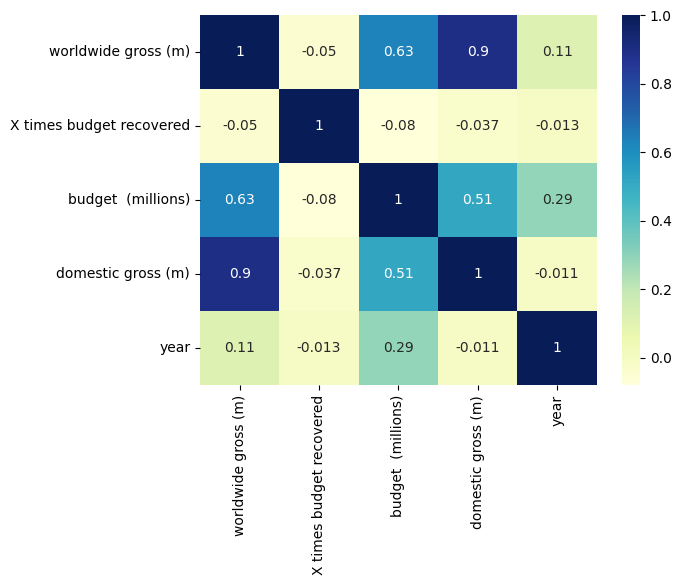

In [85]:
# heatmap for worlwide gross x budget
sns.heatmap(top500movies_df.corr(), cmap="YlGnBu", annot=True)

In [86]:
# It appears that both worldwide & domestic gross are strongly correlated, 
# but it appears that year and X times budget recovered amount is not correlated with budget.